In [ ]:
knitr::opts_chunk$set(echo = TRUE)

# Libraries

In [1]:
library(Seurat)
library(reshape2)
library(tidyverse)
library(ggplot2)
library(ggsignif)
library(dplyr)
library(viridis)
library(ComplexHeatmap)
library(genefilter)
library(ggsignif)

Warning message:
“package ‘Seurat’ was built under R version 4.0.3”
Attaching SeuratObject

Registered S3 method overwritten by 'cli':
  method     from    
  print.boxx spatstat

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.3”
Warning message:
“package ‘tibble’ was built under R version 4.0.3”
Warning message:
“package ‘readr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.3”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘ggsignif’ was built under R version 4.0.3”
Loading required package

# T and NK cell subclustering

Use pbmc object for subclustering - these subclustering steps are optional to reproduce the T cell analysis, as the fully processed T cell dataset is provided below. To run the following pre-processing steps, please download the pbmc dataset (Ramaswamy2021_MIS-C_10x_PBMC)

In [ ]:
#misc.pbmc <- readRDS("shared/FG_uploads/misc_pbmc_final_upload.rds") 

In [ ]:
# MISC_integrated_NKT <- subset(misc.pbmc,
#                               idents = c("17", "3", "20", "7", "11", "9",
#                                          "13", "19", "0", "14", "16", "6", "1", "4", "26"))
# 
# Idents(MISC_integrated_NKT) <- "sample_id"
# 
# 
# MISC_integrated_A1 <- subset(MISC_integrated_NKT, idents =  "A.COV1.1")
# MISC_integrated_A12 <- subset(MISC_integrated_NKT, idents =  "A.COV1.2")
# MISC_integrated_A2 <- subset(MISC_integrated_NKT, idents =  "A.COV2.1")
# MISC_integrated_A22 <- subset(MISC_integrated_NKT, idents =  "A.COV2.2")
# MISC_integrated_A3 <- subset(MISC_integrated_NKT, idents =  "A.COV3.1")
# MISC_integrated_A32 <- subset(MISC_integrated_NKT, idents =  "A.COV3.2")
# MISC_integrated_A4 <- subset(MISC_integrated_NKT, idents =  "A.COV4.1")
# MISC_integrated_A42 <- subset(MISC_integrated_NKT, idents =  "A.COV4.2")
# MISC_integrated_A52 <- subset(MISC_integrated_NKT, idents =  "A.COV5.2")
# MISC_integrated_A62 <- subset(MISC_integrated_NKT, idents =  "A.COV6.2")
# MISC_integrated_HD1 <- subset(MISC_integrated_NKT, idents =  "A.HD1")
# MISC_integrated_HD2 <- subset(MISC_integrated_NKT, idents =  "A.HD2")
# MISC_integrated_HD3 <- subset(MISC_integrated_NKT, idents =  "A.HD3")
# MISC_integrated_HD4 <- subset(MISC_integrated_NKT, idents =  "A.HD4")
# MISC_integrated_HD5 <- subset(MISC_integrated_NKT, idents =  "A.HD5")
# MISC_integrated_HD6 <- subset(MISC_integrated_NKT, idents =  "A.HD6")
# MISC_integrated_HD7 <- subset(MISC_integrated_NKT, idents =  "A.HD7")
# MISC_integrated_HD8 <- subset(MISC_integrated_NKT, idents =  "A.HD8")
# MISC_integrated_HD9 <- subset(MISC_integrated_NKT, idents =  "A.HD9")
# MISC_integrated_HD10 <- subset(MISC_integrated_NKT, idents =  "A.HD10")
# MISC_integrated_HD11 <- subset(MISC_integrated_NKT, idents =  "A.HD11")
# MISC_integrated_HD12 <- subset(MISC_integrated_NKT, idents =  "A.HD12")
# MISC_integrated_HD13 <- subset(MISC_integrated_NKT, idents =  "A.HD13")
# MISC_integrated_CHD1 <- subset(MISC_integrated_NKT, idents =  "C.HD1")
# MISC_integrated_CHD2 <- subset(MISC_integrated_NKT, idents =  "C.HD2")
# MISC_integrated_CHD3 <- subset(MISC_integrated_NKT, idents =  "C.HD3")
# MISC_integrated_CHD4 <- subset(MISC_integrated_NKT, idents =  "C.HD4")
# MISC_integrated_CHD5 <- subset(MISC_integrated_NKT, idents =  "C.HD5")
# MISC_integrated_CHD6 <- subset(MISC_integrated_NKT, idents =  "C.HD6")
# MISC_integrated_P1 <- subset(MISC_integrated_NKT, idents =  "P1.1")
# MISC_integrated_P2 <- subset(MISC_integrated_NKT, idents =  "P2.1")
# MISC_integrated_P31 <- subset(MISC_integrated_NKT, idents =  "P3.1")
# MISC_integrated_P32 <- subset(MISC_integrated_NKT, idents =  "P3.2")
# MISC_integrated_P41 <- subset(MISC_integrated_NKT, idents =  "P4.1")
# MISC_integrated_P42 <- subset(MISC_integrated_NKT, idents =  "P4.2")
# MISC_integrated_P5 <- subset(MISC_integrated_NKT, idents =  "P5.1")
# MISC_integrated_P6 <- subset(MISC_integrated_NKT, idents =  "P6.1")
# MISC_integrated_P7 <- subset(MISC_integrated_NKT, idents =  "P7.1")
# 
# DefaultAssay(MISC_integrated_A1) <- "RNA"
# DefaultAssay(MISC_integrated_A12) <- "RNA"
# DefaultAssay(MISC_integrated_A2) <- "RNA"
# DefaultAssay(MISC_integrated_A22) <- "RNA"
# DefaultAssay(MISC_integrated_A3) <- "RNA"
# DefaultAssay(MISC_integrated_A32) <- "RNA"
# DefaultAssay(MISC_integrated_A4) <- "RNA"
# DefaultAssay(MISC_integrated_A42) <- "RNA"
# DefaultAssay(MISC_integrated_A52) <- "RNA"
# DefaultAssay(MISC_integrated_A62) <- "RNA"
# DefaultAssay(MISC_integrated_HD1) <- "RNA"
# DefaultAssay(MISC_integrated_HD2) <- "RNA"
# DefaultAssay(MISC_integrated_HD3) <- "RNA"
# DefaultAssay(MISC_integrated_HD4) <- "RNA"
# DefaultAssay(MISC_integrated_HD5) <- "RNA"
# DefaultAssay(MISC_integrated_HD6) <- "RNA"
# DefaultAssay(MISC_integrated_HD7) <- "RNA"
# DefaultAssay(MISC_integrated_HD8) <- "RNA"
# DefaultAssay(MISC_integrated_HD9) <- "RNA"
# DefaultAssay(MISC_integrated_HD10) <- "RNA"
# DefaultAssay(MISC_integrated_HD11) <- "RNA"
# DefaultAssay(MISC_integrated_HD12) <- "RNA"
# DefaultAssay(MISC_integrated_HD13) <- "RNA"
# DefaultAssay(MISC_integrated_CHD1) <- "RNA"
# DefaultAssay(MISC_integrated_CHD2) <- "RNA"
# DefaultAssay(MISC_integrated_CHD3) <- "RNA"
# DefaultAssay(MISC_integrated_CHD4) <- "RNA"
# DefaultAssay(MISC_integrated_CHD5) <- "RNA"
# DefaultAssay(MISC_integrated_CHD6) <- "RNA"
# DefaultAssay(MISC_integrated_P1) <- "RNA"
# DefaultAssay(MISC_integrated_P2) <- "RNA"
# DefaultAssay(MISC_integrated_P31) <- "RNA"
# DefaultAssay(MISC_integrated_P32) <- "RNA"
# DefaultAssay(MISC_integrated_P41) <- "RNA"
# DefaultAssay(MISC_integrated_P42) <- "RNA"
# DefaultAssay(MISC_integrated_P5) <- "RNA"
# DefaultAssay(MISC_integrated_P6) <- "RNA"
# DefaultAssay(MISC_integrated_P7) <- "RNA"
# 
# MISC_integrated_A1_counts <- GetAssayData(MISC_integrated_A1, slot = "counts")
# MISC_A1 <- CreateSeuratObject(counts = MISC_integrated_A1_counts, project = "MISC_A1")
# MISC_integrated_A12_counts <- GetAssayData(MISC_integrated_A12, slot = "counts")
# MISC_A12 <- CreateSeuratObject(counts = MISC_integrated_A12_counts, project = "MISC_A12")
# MISC_integrated_A2_counts <- GetAssayData(MISC_integrated_A2, slot = "counts")
# MISC_A2 <- CreateSeuratObject(counts = MISC_integrated_A2_counts, project = "MISC_A2")
# MISC_integrated_A22_counts <- GetAssayData(MISC_integrated_A22, slot = "counts")
# MISC_A22 <- CreateSeuratObject(counts = MISC_integrated_A22_counts, project = "MISC_A22")
# MISC_integrated_A3_counts <- GetAssayData(MISC_integrated_A3, slot = "counts")
# MISC_A3 <- CreateSeuratObject(counts = MISC_integrated_A3_counts, project = "MISC_A3")
# MISC_integrated_A32_counts <- GetAssayData(MISC_integrated_A32, slot = "counts")
# MISC_A32 <- CreateSeuratObject(counts = MISC_integrated_A32_counts, project = "MISC_A32")
# MISC_integrated_A4_counts <- GetAssayData(MISC_integrated_A4, slot = "counts")
# MISC_A4 <- CreateSeuratObject(counts = MISC_integrated_A4_counts, project = "MISC_A4")
# MISC_integrated_A42_counts <- GetAssayData(MISC_integrated_A42, slot = "counts")
# MISC_A42 <- CreateSeuratObject(counts = MISC_integrated_A42_counts, project = "MISC_A42")
# MISC_integrated_A52_counts <- GetAssayData(MISC_integrated_A52, slot = "counts")
# MISC_A52 <- CreateSeuratObject(counts = MISC_integrated_A52_counts, project = "MISC_A52")
# MISC_integrated_A62_counts <- GetAssayData(MISC_integrated_A62, slot = "counts")
# MISC_A62 <- CreateSeuratObject(counts = MISC_integrated_A62_counts, project = "MISC_A62")
# MISC_integrated_HD1_counts <- GetAssayData(MISC_integrated_HD1, slot = "counts")
# MISC_HD1 <- CreateSeuratObject(counts = MISC_integrated_HD1_counts, project = "MISC_HD1")
# MISC_integrated_HD2_counts <- GetAssayData(MISC_integrated_HD2, slot = "counts")
# MISC_HD2 <- CreateSeuratObject(counts = MISC_integrated_HD2_counts, project = "MISC_HD2")
# MISC_integrated_HD3_counts <- GetAssayData(MISC_integrated_HD3, slot = "counts")
# MISC_HD3 <- CreateSeuratObject(counts = MISC_integrated_HD3_counts, project = "MISC_HD3")
# MISC_integrated_HD4_counts <- GetAssayData(MISC_integrated_HD4, slot = "counts")
# MISC_HD4 <- CreateSeuratObject(counts = MISC_integrated_HD4_counts, project = "MISC_HD4")
# MISC_integrated_HD5_counts <- GetAssayData(MISC_integrated_HD5, slot = "counts")
# MISC_HD5 <- CreateSeuratObject(counts = MISC_integrated_HD5_counts, project = "MISC_HD5")
# MISC_integrated_HD6_counts <- GetAssayData(MISC_integrated_HD6, slot = "counts")
# MISC_HD6 <- CreateSeuratObject(counts = MISC_integrated_HD6_counts, project = "MISC_HD6")
# MISC_integrated_HD7_counts <- GetAssayData(MISC_integrated_HD7, slot = "counts")
# MISC_HD7 <- CreateSeuratObject(counts = MISC_integrated_HD7_counts, project = "MISC_HD7")
# MISC_integrated_HD8_counts <- GetAssayData(MISC_integrated_HD8, slot = "counts")
# MISC_HD8 <- CreateSeuratObject(counts = MISC_integrated_HD8_counts, project = "MISC_HD8")
# MISC_integrated_HD9_counts <- GetAssayData(MISC_integrated_HD9, slot = "counts")
# MISC_HD9 <- CreateSeuratObject(counts = MISC_integrated_HD9_counts, project = "MISC_HD9")
# MISC_integrated_HD10_counts <- GetAssayData(MISC_integrated_HD10, slot = "counts")
# MISC_HD10 <- CreateSeuratObject(counts = MISC_integrated_HD10_counts, project = "MISC_HD10")
# MISC_integrated_HD11_counts <- GetAssayData(MISC_integrated_HD11, slot = "counts")
# MISC_HD11 <- CreateSeuratObject(counts = MISC_integrated_HD11_counts, project = "MISC_HD11")
# MISC_integrated_HD12_counts <- GetAssayData(MISC_integrated_HD12, slot = "counts")
# MISC_HD12 <- CreateSeuratObject(counts = MISC_integrated_HD12_counts, project = "MISC_HD12")
# MISC_integrated_HD13_counts <- GetAssayData(MISC_integrated_HD13, slot = "counts")
# MISC_HD13 <- CreateSeuratObject(counts = MISC_integrated_HD13_counts, project = "MISC_HD13")
# MISC_integrated_CHD1_counts <- GetAssayData(MISC_integrated_CHD1, slot = "counts")
# MISC_CHD1 <- CreateSeuratObject(counts = MISC_integrated_CHD1_counts, project = "MISC_CHD1")
# MISC_integrated_CHD2_counts <- GetAssayData(MISC_integrated_CHD2, slot = "counts")
# MISC_CHD2 <- CreateSeuratObject(counts = MISC_integrated_CHD2_counts, project = "MISC_CHD2")
# MISC_integrated_CHD3_counts <- GetAssayData(MISC_integrated_CHD3, slot = "counts")
# MISC_CHD3 <- CreateSeuratObject(counts = MISC_integrated_CHD3_counts, project = "MISC_CHD3")
# MISC_integrated_CHD4_counts <- GetAssayData(MISC_integrated_CHD4, slot = "counts")
# MISC_CHD4 <- CreateSeuratObject(counts = MISC_integrated_CHD4_counts, project = "MISC_CHD4")
# MISC_integrated_CHD5_counts <- GetAssayData(MISC_integrated_CHD5, slot = "counts")
# MISC_CHD5 <- CreateSeuratObject(counts = MISC_integrated_CHD5_counts, project = "MISC_CHD5")
# MISC_integrated_CHD6_counts <- GetAssayData(MISC_integrated_CHD6, slot = "counts")
# MISC_CHD6 <- CreateSeuratObject(counts = MISC_integrated_CHD6_counts, project = "MISC_CHD6")
# MISC_integrated_P1_counts <- GetAssayData(MISC_integrated_P1, slot = "counts")
# MISC_P1 <- CreateSeuratObject(counts = MISC_integrated_P1_counts, project = "MISC_P1")
# MISC_integrated_P2_counts <- GetAssayData(MISC_integrated_P2, slot = "counts")
# MISC_P2 <- CreateSeuratObject(counts = MISC_integrated_P2_counts, project = "MISC_P2")
# MISC_integrated_P31_counts <- GetAssayData(MISC_integrated_P31, slot = "counts")
# MISC_P31 <- CreateSeuratObject(counts = MISC_integrated_P31_counts, project = "MISC_P31")
# MISC_integrated_P32_counts <- GetAssayData(MISC_integrated_P32, slot = "counts")
# MISC_P32 <- CreateSeuratObject(counts = MISC_integrated_P32_counts, project = "MISC_P32")
# MISC_integrated_P41_counts <- GetAssayData(MISC_integrated_P41, slot = "counts")
# MISC_P41 <- CreateSeuratObject(counts = MISC_integrated_P41_counts, project = "MISC_P41")
# MISC_integrated_P42_counts <- GetAssayData(MISC_integrated_P42, slot = "counts")
# MISC_P42 <- CreateSeuratObject(counts = MISC_integrated_P42_counts, project = "MISC_P42")
# MISC_integrated_P5_counts <- GetAssayData(MISC_integrated_P5, slot = "counts")
# MISC_P5 <- CreateSeuratObject(counts = MISC_integrated_P5_counts, project = "MISC_P5")
# MISC_integrated_P6_counts <- GetAssayData(MISC_integrated_P6, slot = "counts")
# MISC_P6 <- CreateSeuratObject(counts = MISC_integrated_P6_counts, project = "MISC_P6")
# MISC_integrated_P7_counts <- GetAssayData(MISC_integrated_P7, slot = "counts")
# MISC_P7 <- CreateSeuratObject(counts = MISC_integrated_P7_counts, project = "MISC_P7")
# 
# # Reference_based integration
# MISC_NKT <- c(MISC_A1, MISC_A12, MISC_A2, MISC_A22, 
#               MISC_A3, MISC_A32, MISC_A4, MISC_A42, MISC_A52, MISC_A62,
#               MISC_HD1, MISC_HD2, MISC_HD3, MISC_HD4, MISC_HD5,
#               MISC_HD6, MISC_HD7, MISC_HD8, MISC_HD9, MISC_HD10,
#               MISC_HD11, MISC_HD12, MISC_HD13, MISC_CHD1, 
#               MISC_CHD2, MISC_CHD3, MISC_CHD4, MISC_CHD5, MISC_CHD6,
#               MISC_P1, MISC_P2, MISC_P31, MISC_P32, MISC_P41, MISC_P42, MISC_P5, MISC_P6, MISC_P7)
# for (i in 1:length(MISC_NKT)) {
#   MISC_NKT[[i]] <- NormalizeData(MISC_NKT[[i]], verbose = TRUE)
#   MISC_NKT[[i]] <- FindVariableFeatures(MISC_NKT[[i]], selection.method = "vst",
#                                                    nfeatures = 2000, vecbose = TRUE)
# }
# MISC_NKT.anchors <- FindIntegrationAnchors(object.list = MISC_NKT, reference = c(13, 30), dims = 1:30)
# MISC_NKT_integrated <- IntegrateData(anchorset = MISC_NKT.anchors, dims = 1:30)
# 
# DefaultAssay(MISC_NKT_integrated) <- "integrated"
# MISC_NKT_integrated <- ScaleData(MISC_NKT_integrated)
# MISC_NKT_integrated <- RunPCA(MISC_NKT_integrated, npcs = 30, veverbose = TRUE)
# 
# # check UMAP
# DefaultAssay(MISC_NKT_integrated) <- "integrated"
# MISC_NKT_integrated <- FindNeighbors(MISC_NKT_integrated, dims = 1:8)
# MISC_NKT_integrated <- FindClusters(MISC_NKT_integrated, resolution = 0.9)
# MISC_NKT_integrated <- RunUMAP(MISC_NKT_integrated, dims = 1:8)
# p1 <- DimPlot(MISC_NKT_integrated, reduction = "umap", label = TRUE,  label.size = 3.5)
# p1
# 
# 
# # annotation
# Idents(MISC_NKT_integrated) <- "integrated_snn_res.0.9"
# DefaultAssay(MISC_NKT_integrated) <- "RNA"
# MISC_NKT_integrated <- RenameIdents(MISC_NKT_integrated, '0' =
#                                       "Naive CD4T cells_1", '1' = "Naive CD4T cells_2", 
#                                     '2' = "Naive CD8T cells",
#                                     '3' = "CD56dim CD38+ NK cells", '4' = "Memory CD4 T cells",
#                                     '5' = "Terminal effector memory CD8 T cells",
#                                     '6' = "Effector memory CD8 T cells", 
#                                     '7' = "CCR6+ Memory CD4+ T cells",
#                                     '8' = "Naive CD4 T cells_3",
#                                     '9' = "Vd2 gdT cells", '10' = "MAIT cells",
#                                     '11' = "CD56bright NK cells", '12' = "CD56dim S1004A+ NK cells",
#                                     '13' = "Regulatory T cells", '14' = "Central memory CD8  T cells",
#                                     '15' = "CXCR3+ Memory CD4+ T cells",
#                                     '16' = "T/NK/monocyte doublets", '17' = "Ki67+ T/NK cells")
# p1 <- DimPlot(MISC_NKT_integrated, reduction = "umap", label = TRUE,  label.size = 3.5, repel = TRUE)
# p1
# 
# # remove doublet_cluster
# MISC_NKT <- subset(MISC_NKT_integrated, idents = "16", invert = T)
# 
# MISC_NKT

# Plot T cell UMAP

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


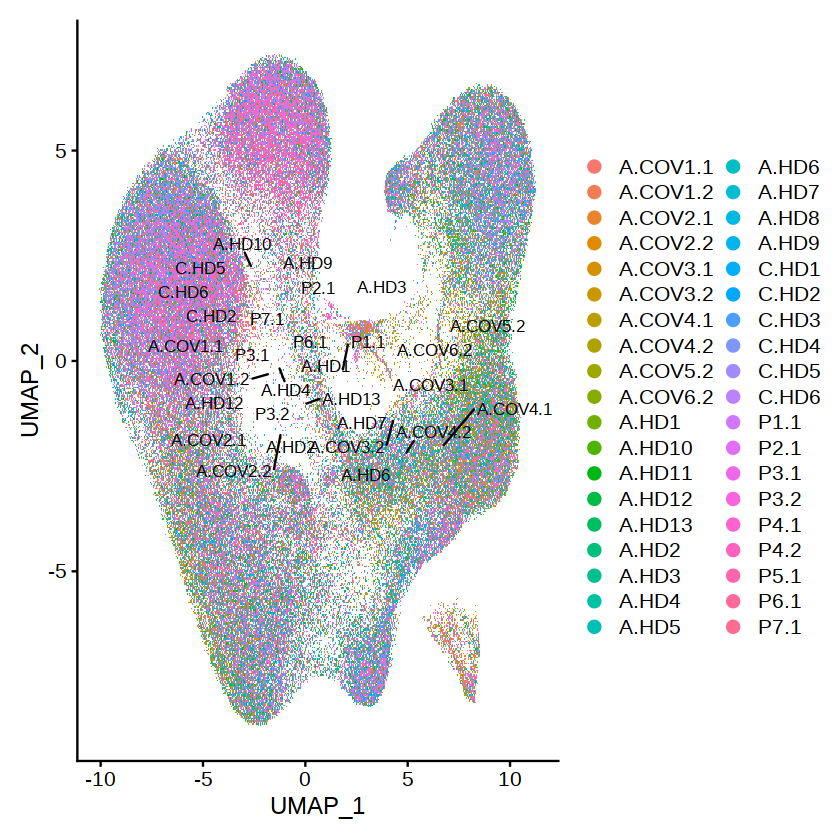

In [3]:
misc.tcell <- readRDS("/fastgenomics/data/dataset_0001/misc_tcell_final_upload.rds") 

p1 <- DimPlot(misc.tcell, reduction = "umap", 
              label = TRUE,  label.size = 3.5, repel = TRUE)
p1

# Dot plot

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



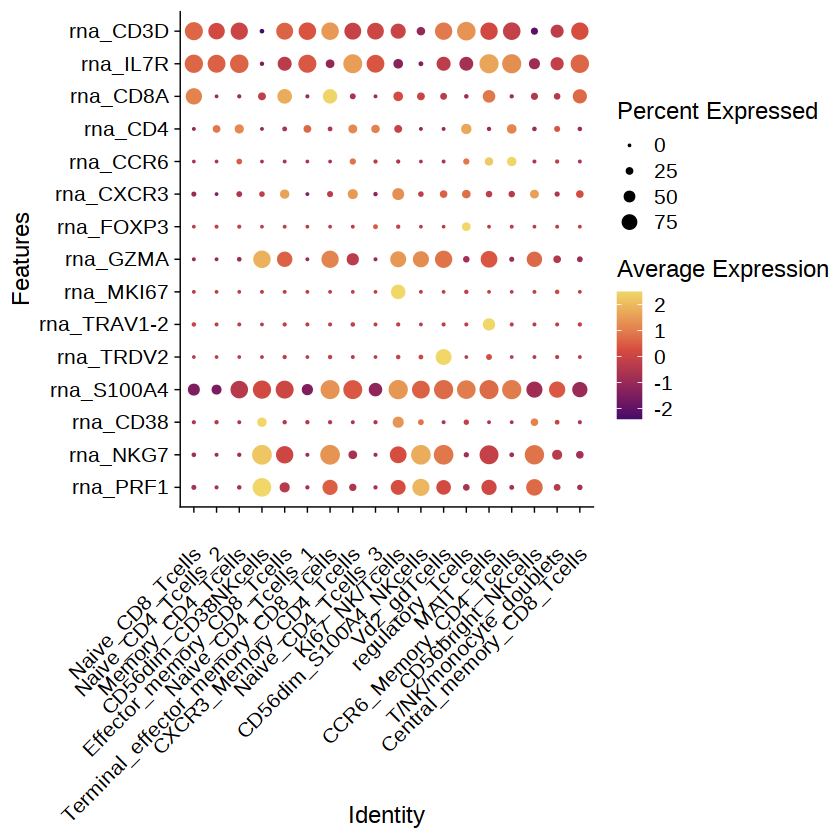

In [4]:
Idents(misc.tcell) <- "subcluster_annotation1"

features.tcell.small <- c("rna_CD3D", "rna_IL7R", "rna_CD8A", "rna_CD4", "rna_CCR6", 
                          "rna_CXCR3", "rna_FOXP3", "rna_GZMA", 
                          "rna_MKI67",  "rna_TRAV1-2", "rna_TRDV2",  
                          "rna_S100A4", "rna_CD38","rna_NKG7", "rna_PRF1")

features.tcell <- c("rna_CD3D", "rna_IL7R", "rna_CD8A", "rna_CD4", "rna_CCR7", "rna_SELL", "rna_TCF7",
                    "rna_LEF1",  "rna_CCR6", "rna_CXCR3", "rna_FOXP3", "rna_GZMA", "rna_GZMB",
                    "rna_GZMH","rna_PRF1", "rna_TIGIT", "rna_CTLA4", "rna_LAG3",  "rna_HAVCR2", "rna_MKI67", 
                    "rna_TRAV1-2", "rna_TRDV2", "rna_TRGV9","rna_IL2RA", 
                    "rna_FCGR3A", "rna_LYZ", "rna_S100A4","rna_CD38", "rna_NKG7")

inferno_mod <- inferno(20)[3:20]
dot <- DotPlot(misc.tcell, features = rev(features.tcell.small),  
               assay = "RNA", dot.scale = 4.5) + 
      scale_color_gradient2(low = inferno_mod[3], 
                            mid = "#D64B40FF", high = "#F1ED6FFF", midpoint = 0.25) +
      theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1, size = 12),
            axis.line = element_line(size = 0.3), axis.ticks = element_line(size = 0.3)) + 
      coord_flip()

dot

# Heatmap

In [7]:
Idents(misc.tcell) <- "subcluster_annotation1"

# Effector memory/memory CD8 subsets
cells.to.keep <- WhichCells(misc.tcell, idents = c("Terminal_effector_memory_CD8_Tcells", "Central_memory_CD8_Tcells", 
                                                     "Effector_memory_CD8_Tcells") ) 
misc.cd8 <- subset(misc.tcell, cells = cells.to.keep)
markers.mem <- FindMarkers(misc.cd8, group.by="condition", ident.1="MIS-C", ident.2="C.HD", assay = "RNA")
head(markers.mem)


markers_mem_up <- markers.mem %>% dplyr::filter(avg_log2FC > 0.5  & (p_val_adj < 0.05 | p_val_adj == 0))
markers_mem_dn <- markers.mem %>% dplyr::filter(avg_log2FC < -0.5  & (p_val_adj < 0.05 | p_val_adj == 0))
markers_mem_up <- markers_mem_up %>% arrange(desc(avg_log2FC))
markers_mem_dn <- markers_mem_dn %>% arrange(avg_log2FC)
top.markers_mem_up <- head(markers_mem_up, 20)
top.markers_mem_dn <- head(markers_mem_dn, 20)

#CD8
features.to.use <- c(rownames(top.markers_mem_up), rownames(top.markers_mem_dn))
Idents(misc.cd8) <- "sample_id"
avg.topmarkers <- AverageExpression(misc.cd8, assays = "RNA", 
                                    features = features.to.use)

col_order <-  c("C.HD1", "C.HD2", "C.HD3", "C.HD4", "C.HD5", "C.HD6",
                "P1.1", "P2.1", "P3.1", "P4.1", "P5.1", "P6.1", "P7.1",
                "P3.2", "P4.2", "A.HD1", "A.HD2", "A.HD3", "A.HD4", "A.HD5",
                "A.HD6", "A.HD7", "A.HD8", "A.HD9", "A.HD10", "A.HD11", "A.HD12", 
                "A.HD13", "A.COV1.1", "A.COV2.1", "A.COV3.1", "A.COV4.1", "A.COV1.2",
                "A.COV2.2", "A.COV3.2", "A.COV4.2", 
                "A.COV5.2", 
                "A.COV6.2")

avg.topmarkers$RNA <- avg.topmarkers$RNA[, col_order]



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TXNIP,0,1.9193454,0.983,0.562,0
TMSB10,0,0.9476976,1.000,0.974,0
CCND3,0,1.3798085,0.843,0.358,0
ACTB,0,1.0526285,0.999,0.990,0
TSC22D3,0,0.9399488,0.960,0.741,0
FTH1,0,-2.3269291,0.991,0.990,0


ERROR: Error in avg.topmarkers$RNA[16:ncol(avg.topmarkers$RNA)] <- NULL: replacement has length zero


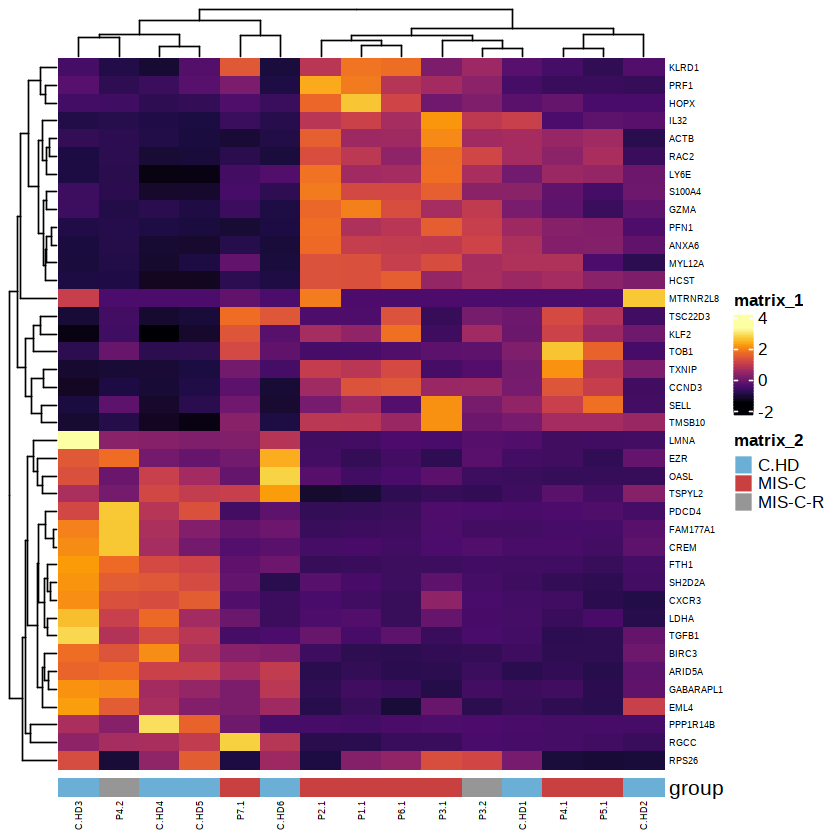

In [13]:
avg.topmarkers$RNA <- avg.topmarkers$RNA[,1:15]
avg.markers1 <- data.matrix(avg.topmarkers[[1]])

avg.markers1 <- genescale(avg.markers1, axis=1, method="Z")

# annotations
col_groups1 <- c(rep("C.HD",6), rep("MIS-C",7), rep("MIS-C-R",2))

annotations <- data.frame(group = col_groups1)
rownames(annotations) <- colnames(avg.topmarkers$RNA)
annotations_t <- t(as.matrix(annotations))
mat_colors <- list(group =  cols <- c("#6baed6", "#c94040", "#969696"))
names(mat_colors$group) <- unique(col_groups1)

Heatmap(avg.markers1, col = inferno(10), row_names_gp = gpar(fontsize = 5, fontfamily = "Helvetica"), 
        column_names_gp = gpar(fontsize = 5, fontfamily = "Helvetica")) %v% 
  Heatmap(annotations_t, col = mat_colors$group, column_names_gp = gpar(fontsize =5, fontfamily = "Helvetica"))

# Cytotoxicity and ITGB7 analysis

Calculate avg expression per donor in subsetted Seurat object per cells and cohorts of interest.

In [3]:
Idents(misc.tcell) <- "subcluster_annotation1"

misc.nk.cd56dim <- subset(misc.tcell, idents= c("CD56dim_S100A4_NKcells", "CD56dim_CD38NKcells"))
misc.nk.cd56b <- subset(misc.tcell, idents= c("CD56bright_NKcells"))
# misc.cd8.mem <- subset(misc.tcell, idents = c("Central_memory_CD8_Tcells","Effector_memory_CD8_Tcells", 
#                                               "Terminal_effector_memory_CD8_Tcells"))

Idents(misc.nk.cd56dim) <- "condition_new"
Idents(misc.nk.cd56b) <- "condition_new"
# Idents(misc.cd8.mem) <= "condition_new"

misc.nk.cd56dim.peds <- subset(misc.nk.cd56dim, idents = c("C.HD", "MIS-C", "MIS-C-R"))
misc.nk.cd56b.peds <- subset(misc.nk.cd56b, idents = c("C.HD", "MIS-C", "MIS-C-R"))
#misc.cd8.mem.peds <- subset(misc.cd8.mem, idents = c("C.HD", "MIS-C", "MIS-C-R"))

misc.nk.cd56dim.adult <- subset(misc.nk.cd56dim, idents = c("A.HD", "COVID19-A", "COVID19-B"))
misc.nk.cd56b.adult <- subset(misc.nk.cd56b, idents = c("A.HD", "COVID19-A", "COVID19-B"))
#misc.cd8.mem.adult <- subset(misc.cd8.mem, idents = c("A.HD", "COVID19-A", "COVID19-B"))

misc.nk.cd56dim.peds <- ScaleData(misc.nk.cd56dim.peds, assay = "RNA")
misc.nk.cd56b.peds <- ScaleData(misc.nk.cd56b.peds, assay = "RNA")
#misc.cd8.mem.peds <- ScaleData(misc.cd8.mem.peds, assay = "RNA")

misc.nk.cd56dim.adult <- ScaleData(misc.nk.cd56dim.adult, assay = "RNA")
misc.nk.cd56b.adult <- ScaleData(misc.nk.cd56b.adult, assay = "RNA")
#misc.cd8.mem.adult <- ScaleData(misc.cd8.mem.adult, assay = "RNA")

# Obtain average expression by donor

# CD56dim
Idents(misc.nk.cd56dim.peds) <- "sample_id"
avg.out <- AverageExpression(misc.nk.cd56dim.peds, assays = "RNA", 
                             slot= "scale.data", 
                             features = c("GZMH", "GZMA", "CCL4", "PRF1")) #remember to scale

avg.df <- avg.out$RNA

head(avg.df)

# CD56bright
Idents(misc.nk.cd56b.peds) <- "sample_id"
avg.out <- AverageExpression(misc.nk.cd56b.peds, assays = "RNA", 
                             slot= "scale.data", 
                             features = c("GZMH", "GZMA", "CCL4", "PRF1")) #remember to scale

avg.df <- avg.out$RNA

head(avg.df)

Centering and scaling data matrix

Centering and scaling data matrix

Centering and scaling data matrix

Centering and scaling data matrix



,C.HD1,C.HD2,C.HD3,C.HD4,C.HD5,C.HD6,P1.1,P2.1,P3.1,P3.2,P4.1,P4.2,P5.1,P6.1,P7.1
GZMH,0.2645279,-0.1634855,-0.3056483,-0.06687382,-0.2149050,-0.5108557,0.4307061,0.6863266,0.01413378,0.3175458,0.03429961,0.14061796,0.03724495,0.1108119,0.0890069
GZMA,0.8801314,0.2108174,-0.4201073,-0.88282579,-0.8180948,-0.6566530,0.8460426,0.8412942,0.50599875,0.8083901,0.68764759,0.06179881,0.78600855,0.7042582,-0.4932088
CCL4,0.1213802,-0.2549849,-0.2265528,-0.45047197,-0.2200705,0.5460577,0.2415992,0.2062138,0.64833302,0.3481993,0.15170759,-0.11500492,0.07526572,0.3110884,1.4639322
PRF1,0.4020084,-0.3704188,-0.2215423,-0.73272260,-0.4740155,-1.4077314,0.5301648,0.8938984,0.86391187,0.8549801,0.45831917,0.06208249,0.40991688,0.3520816,-0.1661565


,C.HD1,C.HD2,C.HD3,C.HD4,C.HD5,C.HD6,P1.1,P2.1,P3.1,P3.2,P4.1,P4.2,P5.1,P6.1,P7.1
GZMH,-0.10470099,-0.480058737,-0.06993645,-0.4521434,0.01518344,-0.5261816,0.3091999,0.6923403,0.10687936,0.39866951,0.2698015,0.283680324,-0.35839235,-0.1741763,-0.2962668
GZMA,0.69574818,0.000997884,-0.48522954,-0.7102695,-0.62646430,-0.7485538,1.3075318,1.2437919,0.75051351,0.70347165,0.6841958,0.009639258,0.55045720,0.6099145,-0.3044249
CCL4,0.01095743,-0.068158906,-0.13704701,-0.4609803,-0.19116427,0.2144447,1.0106660,0.8518055,0.07135584,0.08929707,0.5422195,-0.298715067,-0.42359332,0.5411483,0.1720968
PRF1,0.18934598,-0.577749336,-0.19422260,-0.8700310,-0.35774209,-1.0743714,1.0889092,1.1115800,0.73585515,0.66447292,0.3908404,0.167396643,0.05438425,0.5248214,-1.0227083


Boxplots depicting expression of genes across donors

In [4]:
gene <- avg.df
gene_t <- as.data.frame(t(as.matrix(gene)))
gene_t$sample <- rownames(gene_t)

head(gene_t)


,GZMH,GZMA,CCL4,PRF1,sample
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C.HD1,-0.10470099,0.695748185,0.01095743,0.1893460,C.HD1
C.HD2,-0.48005874,0.000997884,-0.06815891,-0.5777493,C.HD2
C.HD3,-0.06993645,-0.485229544,-0.13704701,-0.1942226,C.HD3
C.HD4,-0.45214339,-0.710269522,-0.46098032,-0.8700310,C.HD4
C.HD5,0.01518344,-0.626464303,-0.19116427,-0.3577421,C.HD5
C.HD6,-0.52618165,-0.748553753,0.21444470,-1.0743714,C.HD6


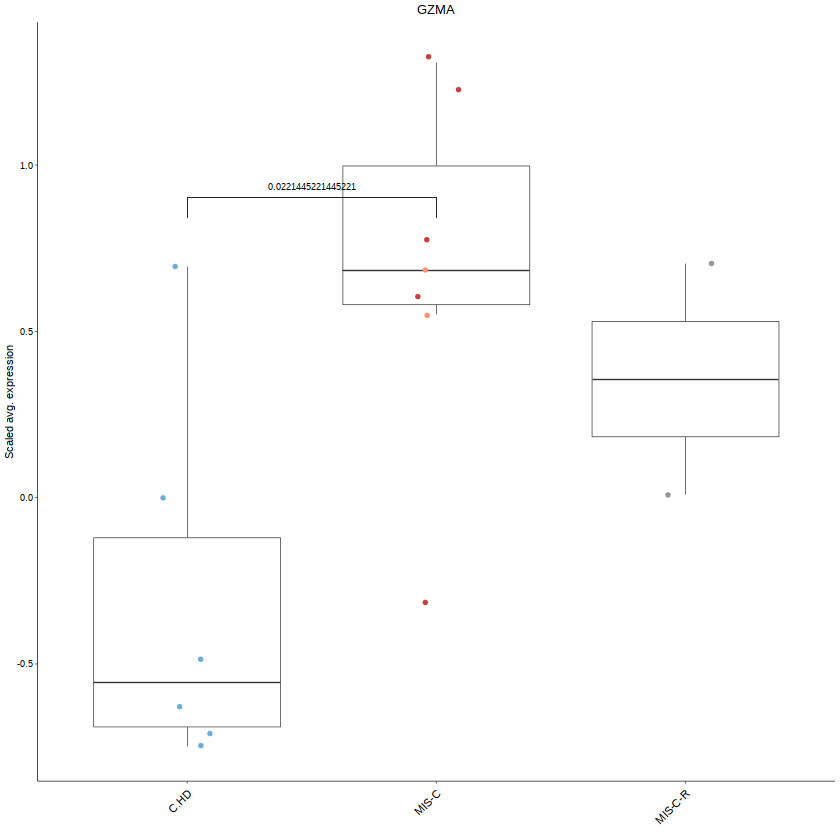

In [5]:
# Peds - same applied to adult

gene_t[gene_t$sample %in% c("P1.1", "P2.1", "P3.1", "P4.1", "P5.1", "P6.1", "P7.1"), 'condition'] <- 'MIS-C'

gene_t[gene_t$sample %in% c("C.HD1", "C.HD2", "C.HD3", "C.HD4", "C.HD5", "C.HD6"), 'condition'] <- 'C.HD'

gene_t[gene_t$sample %in% c("P3.2", "P4.2"), 'condition'] <- 'MIS-C-R'

gene_severe <- gene_t %>% dplyr::filter(sample %in% c("P1.1", "P2.1", "P3.1", "P6.1", "P7.1"))


gene_chd <- gene_t %>% dplyr::filter(condition == "C.HD")
gene_misc <- gene_t %>% dplyr::filter(condition == "MIS-C")


# Wilcox
w.test <- wilcox.test(x = gene_chd$CCL4, y = gene_misc$CCL4, 
                      alternative = c("two.sided"), correct = FALSE)
pval_ccl4 <- w.test$p.value 
w.test <- wilcox.test(x = gene_chd$GZMH, y = gene_misc$GZMH, 
                      alternative = c("two.sided"), correct = FALSE)
pval_gzmh <- w.test$p.value 
w.test <- wilcox.test(x = gene_chd$GZMA, y = gene_misc$GZMA, 
                      alternative = c("two.sided"), correct = FALSE)
pval_gzma <- w.test$p.value 
w.test <- wilcox.test(x = gene_chd$PRF1, y = gene_misc$PRF1, 
                      alternative = c("two.sided"), correct = FALSE)
pval_prf1 <- w.test$p.value
#w.test <- wilcox.test(x = gene_chd$ITGB7, y = gene_misc$ITGB7, 
#                     alternative = c("two.sided"), correct = FALSE)
#pval_itgb7 <- w.test$p.value


# Levels

gene_t$condition <- factor(gene_t$condition, levels = c("C.HD", "MIS-C", "MIS-C-R"))
gene_severe$condition <- factor(gene_severe$condition, levels = c("C.HD", "MIS-C", "MIS-C-R"))
gene_t_2 <- gene_t %>% dplyr::filter(!(sample %in% c("P1.1", "P2.1", "P3.1", "P6.1", "P7.1")))


cols <- c("#6baed6", "#FC9272", "#969696", "#9970ab", "#ec7014", "#fec44f")

plot1 <- ggplot(gene_t, aes(x = condition, y = GZMA)) +
  geom_boxplot(lwd=0.15, outlier.shape = NA) +
  geom_jitter(data=gene_severe, colour ="#c94040",  size = 0.5, width = 0.12)+
  geom_jitter(data = gene_t_2, aes(colour = condition), size = 0.5, width = 0.12) +
  ggtitle("GZMA") +
  xlab("") +
  scale_color_manual(values = cols) +
  geom_signif(comparisons = list(c("C.HD", "MIS-C")), annotation = pval_gzma, size = 0.18, textsize = 1.8,
              y_position = 0.8) +
  theme_classic(base_size = 6) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1, size = 6, color = "black"),
        axis.text.y = element_text(color = "black"), axis.line=element_line(size = 0.15), 
        legend.position = "none", axis.ticks = element_line(size = 0.15),
        plot.title = element_text(hjust = 0.5)) +
  ylab("Scaled avg. expression")

plot1